# Libraries

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Dataset

In [2]:
dataset = pd.read_csv('Wine.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting Feature and Target

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# PCA

## Apply PCA Function

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

## FIt Logistic Prediction

In [16]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

# Evaluation

Accuracy score: 0.9722222222222222


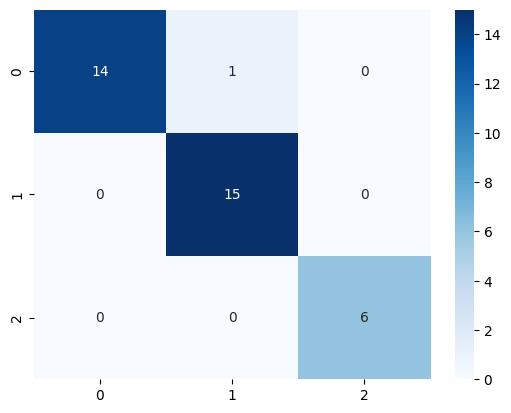

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_pred, y_test)
print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')
sns.heatmap(cm, annot = True, cmap = 'Blues')
plt.show()

/var/folders/gs/8hzdd84d32s7yqjqg1s3g19h0000gn/T/ipykernel_3060/668164202.py:17: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[Y_set == t, 0], X_set[Y_set == t, 1],


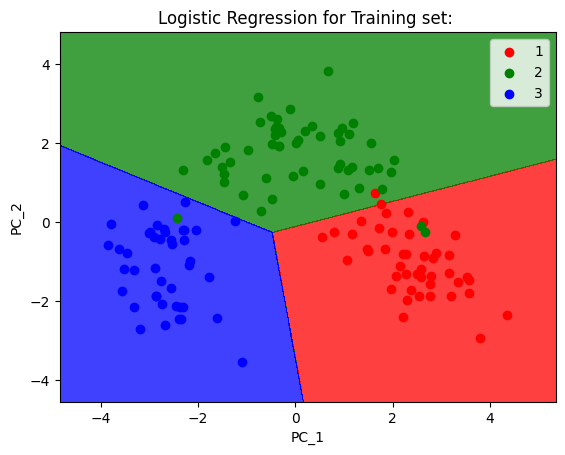

In [40]:
from matplotlib.colors import ListedColormap as LCM  
   
X_set, Y_set = X_train, y_train  
X_1, X_2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,  
                     stop = X_set[: , 0].max() + 1, step = 0.01),  
                     np.arange(start = X_set[: , 1].min() - 1,  
                     stop = X_set[: , 1].max() + 1, step = 0.01))  
   
plt.contourf(X_1, X_2, classifier.predict(np.array([X_1.ravel(),  
             X_2.ravel()]).T).reshape(X_1.shape), alpha = 0.75,  
             cmap = LCM (('red', 'green', 'blue')))  
   
plt.xlim (X_1.min(), X_1.max())  
plt.ylim (X_2.min(), X_2.max())  
   
for s, t in enumerate(np.unique(Y_set)):  
    plt.scatter(X_set[Y_set == t, 0], X_set[Y_set == t, 1],  
                c = LCM (('red', 'green', 'blue'))(s), label = t)  
   
plt.title('Logistic Regression for Training set: ')  
plt.xlabel ('PC_1') # for X_label  
plt.ylabel ('PC_2') # for Y_label  
plt.legend() # for showing legend  
   
# show scatter plot  
plt.show()  